# Pizza hut project 
Customer life time value and churn rate prediction 

In this Chapter, I am going to do one of a supervised learning in Machine Learning Projects. I am going to build a machine that will be able to classifies which a model to predict which customers are likely to not place an order in the next 6 months, as well as estimating the potential revenue from current customers in the same period, involves several steps. The benefits of this projects for business process is as follows:


- Reduce cost specifically in marketing and customer services in terms of time, focus, and energy.
- Improve Customer Services Quality
- Here are the steps that I took in finishing this Classification Projects :

- Data Cleaning
- Churn rate on Datasets


# 1. Introduction

Customer Lifetime Value has 3 key factors to the business goals:
1. How much can we spend to acquire a new customer? (LTV - CAC)
2. Which customers are most valuable? CLV Segmentation
3. How can we increase Customer Life Time Value? Marketing Strategy



4 Methods to calculate Customer Lifetime Value (Split into 2 Categories)
+ Descriptive : Aggregate Models, Cohort models 
+ Predictive: Probabilistic Models, Machine learing models 
 

Basic CLV Equation used in Descriptive method 
CLV = Average Purchase Value * Purchase Frequency * Customer Lifespan

Probabiliistic models:
+ relatively easy to set up 
+ much more accurate than descriptive methods


Meachine learning models:
+ ML models are more flexible and accurate 
+ Opens up interpretable ML (SHAP)
+ Allows us to get closer to the true relation ships from our marketing experiments 


In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Loading data 
path=r'D:\study_da\Home work lv3\ven_demo\venv\Include\Pizza hut\Data set.xlsx'
df = pd.read_excel(path)
df.head()




,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi


In [3]:
# 1.Convert Data 
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Unnamed: 0       1048575 non-null  int64              
 1   BillID           1048575 non-null  int64              
 2   Channel          1048575 non-null  object             
 3   OrderFrom        1048575 non-null  object             
 4   TransactionDate  1048575 non-null  datetime64[ns, UTC]
 5   SalesAmount      1048575 non-null  int64              
 6   CustomerID       1048575 non-null  int64              
 7   CustomerGender   1048575 non-null  object             
 8   VoucherStatus    1048575 non-null  object             
 9   Province         1048575 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 80.0+ MB


# 2. CLV Calculation

## 1. Descriptive CLV Models (Covered in this scripts)

In [5]:
df.columns

Index(['Unnamed: 0', 'BillID', 'Channel', 'OrderFrom', 'TransactionDate',
       'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus',
       'Province'],
      dtype='object')

In [6]:
# 1. Aggrregation Models 
# Aggregatin models are used to calculate to average customer life time value for a group at customers or a cohort 

In [7]:
# calculate recency, frequency,monetary
customer_sales_1_df=df.groupby('CustomerID').agg({'TransactionDate':lambda x: (x.max()-x.min()).days,'BillID':\
                                lambda x: x.nunique(), 'SalesAmount':['sum', 'mean']}).reset_index()



In [8]:
customer_sales_1_df.columns = ['CustomerID', 'time_days', 'frequency', 'total_sales', 'avg_sales']
customer_sales_1_df

,CustomerID,time_days,frequency,total_sales,avg_sales
0,0,0,1,411663,4.116630e+05
1,1,0,1,105503,1.055030e+05
2,8,0,1,1098496,1.098496e+06
3,16,0,1,286558,2.865580e+05
4,18,0,1,287492,2.874920e+05
...,...,...,...,...,...
583637,2174065,0,1,138943,1.389430e+05
583638,2174066,0,1,143685,1.436850e+05
583639,2174072,82,3,953618,3.178727e+05
583640,2174075,0,1,262489,2.624890e+05


In [9]:
summary_1={'average_sales':customer_sales_1_df['avg_sales'].mean(),
           'average_purchased_freq':customer_sales_1_df['frequency'].mean(),
           'churn_rate':1-(customer_sales_1_df['frequency']>1).sum()/len(customer_sales_1_df['frequency']),
            'max_day': customer_sales_1_df['time_days'].max()}
summary_1_df=pd.DataFrame([summary_1])
summary_1_df
           

,average_sales,average_purchased_freq,churn_rate,max_day
0,301162.35545,1.796606,0.706704,465


In [10]:
# Define the constrains 
profit_margin= 0.15 # 15% profit on products 
customer_lifetime= 5 # 5 years 
eps_churn_rate=0.001 
# Churn rate calculation
summary_1_df['clv_churn_method']=(summary_1_df['average_sales']
*summary_1_df['average_purchased_freq']/(summary_1_df['churn_rate']+eps_churn_rate))*profit_margin
# Life time CLV Calculation
summary_1_df['clv_lifetime_method']=(summary_1_df['average_sales']*summary_1_df['average_purchased_freq']/
             (summary_1_df['max_day']/365)*customer_lifetime)*profit_margin
summary_1_df 

,average_sales,average_purchased_freq,churn_rate,max_day,clv_churn_method,clv_lifetime_method
0,301162.35545,1.796606,0.706704,465,114681.509047,318533.286302


In [11]:
# 2.0 Cohort models
# Cohort models are used to calculate the average customer. Lifetime value for a group of customer or a cohort. Often times,
# cohort is defined by the customer's first purchase date 
# Constants 
profit_margin= 0.15 # 15% profit on products 
customer_lifetime= 5 # 5 years 
eps_churn_rate=0.001 
# Calculate start_months for each customer 
df['month'] = df.TransactionDate.dt.month
df['year'] = df.TransactionDate.dt.year
df['month_year']=df['year']*100+df['month']
df_min_purchased_date=df.groupby('CustomerID')['month_year'].min()



In [12]:
df_purchase=pd.merge(customer_sales_1_df,df_min_purchased_date,how='left',on='CustomerID')
df_purchase

,CustomerID,time_days,frequency,total_sales,avg_sales,month_year
0,0,0,1,411663,4.116630e+05,202112
1,1,0,1,105503,1.055030e+05,202203
2,8,0,1,1098496,1.098496e+06,202207
3,16,0,1,286558,2.865580e+05,202209
4,18,0,1,287492,2.874920e+05,202201
...,...,...,...,...,...,...
583637,2174065,0,1,138943,1.389430e+05,202204
583638,2174066,0,1,143685,1.436850e+05,202301
583639,2174072,82,3,953618,3.178727e+05,202209
583640,2174075,0,1,262489,2.624890e+05,202212


In [13]:
summary_2_df=df_purchase.groupby('month_year').agg({'CustomerID':'nunique','avg_sales':'mean','frequency':['mean',
                                                     lambda x:1 -(x>5).sum()/len(x)],
                                                    'time_days':'max'}).reset_index()
summary_2_df.columns=['start_month','cohort_size','avg_sales','avg_purchased_feq','churn_rate','max_days']
summary_2_df

,start_month,cohort_size,avg_sales,avg_purchased_feq,churn_rate,max_days
0,202110,64247,302708.324411,3.084206,0.857270,465
1,202111,51021,292066.824349,2.470865,0.904294,434
2,202112,52547,294718.416430,2.133899,0.935334,404
3,202201,48625,289838.438925,1.887630,0.953830,373
4,202202,44710,288537.652952,1.690964,0.967971,342
5,202203,41968,286474.320205,1.655071,0.971669,314
6,202204,35517,293967.188434,1.571219,0.977363,283
7,202205,37181,333183.975221,1.498427,0.981684,253
8,202206,37132,320047.251527,1.424459,0.985996,221
9,202207,34102,295278.367639,1.365785,0.988798,192


In [14]:
# Add churn CLV  calculation 
summary_2_df['clv_churn_method']=(summary_2_df['avg_sales']
*summary_2_df['avg_purchased_feq']/(summary_2_df['churn_rate']+eps_churn_rate))*profit_margin
# Life time CLV Calculation
summary_2_df['clv_lifetime_method']=(summary_2_df['avg_sales']*summary_2_df['avg_purchased_feq']/
             (summary_2_df['max_days']/365)*customer_lifetime)*profit_margin
summary_2_df 

,start_month,cohort_size,avg_sales,avg_purchased_feq,churn_rate,max_days,clv_churn_method,clv_lifetime_method
0,202110,64247,302708.324411,3.084206,0.857270,465,163168.119476,5.496281e+05
1,202111,51021,292066.824349,2.470865,0.904294,434,119572.883819,4.551931e+05
2,202112,52547,294718.416430,2.133899,0.935334,404,100749.198092,4.261416e+05
3,202201,48625,289838.438925,1.887630,0.953830,373,85948.413145,4.015301e+05
4,202202,44710,288537.652952,1.690964,0.967971,342,75529.596981,3.905394e+05
5,202203,41968,286474.320205,1.655071,0.971669,314,73118.695819,4.133583e+05
6,202204,35517,293967.188434,1.571219,0.977363,283,70815.276594,4.467899e+05
7,202205,37181,333183.975221,1.498427,0.981684,253,76207.352224,5.401983e+05
8,202206,37132,320047.251527,1.424459,0.985996,221,69285.103157,5.647104e+05
9,202207,34102,295278.367639,1.365785,0.988798,192,61116.506304,5.749987e+05


Conclusion
1. I don't trust these CLV calculation. They are super optimistic for the churn calculation. Life time is a bit more realistic, but still has not earned my trust 
2. The bottom line is that as we get more granular, we can gain higher acurracy in our calculation 
3. The next step is to build predictive models to forecast future customer lifetime value 


## 2. Meachine Learning Pycaret

In [4]:
import pycaret.classification as clf 
import pycaret.regression as reg 
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import plotly.graph_objs as go 
from yellowbrick.cluster import KElbowVisualizer




In [5]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1048570,Delivery,STORE,2023-01-09 00:00:00+00:00,178107,1398136,Unknown,No,Southern Provinces
1048571,1048571,1048571,Take Away,STORE,2023-01-09 00:00:00+00:00,331447,2023258,Unknown,No,Hanoi
1048572,1048572,1048572,Take Away,WEBSITE,2023-01-09 00:00:00+00:00,381509,2041510,Female,Yes,Southern Provinces
1048573,1048573,1048573,Take Away,STORE,2023-01-09 00:00:00+00:00,508205,1927215,Unknown,Yes,Hanoi


In [7]:
# Meachine learning 
# Frame the problems : 
# What will customers spend in the next 6_months (Regression)
# What is the probability of a customer to make a purchase in next 6 months
n_days=180
max_date=df['TransactionDate'].max()

cut_off=max_date-pd.to_timedelta(n_days, unit="d")
min_date=cut_off-pd.to_timedelta(n_days, unit="d")


In [18]:
df['TransactionDate'].value_counts()

TransactionDate
2022-01-01 00:00:00+00:00    4790
2021-12-24 00:00:00+00:00    4754
2021-12-25 00:00:00+00:00    4326
2022-03-08 00:00:00+00:00    4242
2021-12-31 00:00:00+00:00    4120
                             ... 
2022-11-08 00:00:00+00:00    1166
2022-09-13 00:00:00+00:00    1130
2022-12-06 00:00:00+00:00    1126
2022-01-31 00:00:00+00:00    1071
2021-12-27 00:00:00+00:00     841
Name: count, Length: 466, dtype: int64

In [19]:
#Train test split 
temporal_in_df = df[(df['TransactionDate'] < cut_off) & (df['TransactionDate'] >= min_date)]
temporal_out_df=df[df['TransactionDate']>= cut_off]\
    .query('CustomerID in @temporal_in_df.CustomerID')
temporal_out_df.head()

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,month,year,month_year
679229,679229,679229,Take Away,STORE,2022-07-13 00:00:00+00:00,222708,267463,Unknown,No,Ho Chi Minh City,7,2022,202207
679232,679232,679232,Delivery,WEBSITE,2022-07-13 00:00:00+00:00,323285,95450,Male,No,Ho Chi Minh City,7,2022,202207
679236,679236,679236,Delivery,APP,2022-07-13 00:00:00+00:00,157329,1823702,Male,No,Hanoi,7,2022,202207
679237,679237,679237,Take Away,APP,2022-07-13 00:00:00+00:00,128437,2045358,Male,Yes,Ho Chi Minh City,7,2022,202207
679242,679242,679242,Take Away,WEBSITE,2022-07-13 00:00:00+00:00,347548,136587,Female,No,Nothern Provinces,7,2022,202207


In [20]:
temporal_out_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154342 entries, 679229 to 1048574
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Unnamed: 0       154342 non-null  int64              
 1   BillID           154342 non-null  int64              
 2   Channel          154342 non-null  object             
 3   OrderFrom        154342 non-null  object             
 4   TransactionDate  154342 non-null  datetime64[ns, UTC]
 5   SalesAmount      154342 non-null  int64              
 6   CustomerID       154342 non-null  int64              
 7   CustomerGender   154342 non-null  object             
 8   VoucherStatus    154342 non-null  object             
 9   Province         154342 non-null  object             
 10  month            154342 non-null  int32              
 11  year             154342 non-null  int32              
 12  month_year       154342 non-null  int32              
dty

In [21]:
temporal_in_df.head()

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,month,year,month_year
251503,251503,251503,Delivery,WEBSITE,2022-01-14 00:00:00+00:00,183024,601036,Male,Yes,Ho Chi Minh City,1,2022,202201
251504,251504,251504,Take Away,STORE,2022-01-14 00:00:00+00:00,2344881,105043,Male,Yes,Hanoi,1,2022,202201
251505,251505,251505,Delivery,CALL CENTER,2022-01-14 00:00:00+00:00,358094,1564414,Female,No,Hanoi,1,2022,202201
251506,251506,251506,Delivery,CALL CENTER,2022-01-14 00:00:00+00:00,283652,1191258,Unknown,No,Nothern Provinces,1,2022,202201
251507,251507,251507,Take Away,CALL CENTER,2022-01-14 00:00:00+00:00,162079,853196,Male,No,Hanoi,1,2022,202201


In [22]:
# Make Target from out data 
targets_df=temporal_out_df.groupby('CustomerID').agg({ 'SalesAmount':['sum']})
targets_df.columns = ['sale_180_values']
targets_df['sale_180_flag'] = 1
targets_df = targets_df.reset_index()
targets_df

,CustomerID,sale_180_values,sale_180_flag
0,25,95304,1
1,38,292120,1
2,43,296913,1
3,97,240962,1
4,175,850003,1
...,...,...,...
72852,2173875,852673,1
72853,2173913,250026,1
72854,2173958,268368,1
72855,2173981,1073490,1


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from pulp import *
import numpy as np
np.random.seed(0)

ModuleNotFoundError: No module named 'sqlalchemy'

In [8]:
Latest_Date = max_date

def create_rfm(df,latest_date):
    #Creating RFM features with subset of customerID
    RFM = df.groupby('CustomerID').agg({'TransactionDate': lambda x: (x.max()-latest_date).days, 
                                                    'BillID': lambda x: x.nunique(), 
                                                    "SalesAmount": lambda x: x.sum()}).reset_index()
                                    
    RFM['TransactionDate'] = RFM['TransactionDate'].astype(int)

    #Renaming column names to Recency, Frequency and Monetary
    RFM.rename(columns={'TransactionDate': 'recency', 
                            'BillID': 'frequency', 
                            'SalesAmount': 'monetary'}, inplace=True)
    return RFM

In [24]:
rfm_df=create_rfm(temporal_in_df,Latest_Date)

In [25]:
rfm_df

,CustomerID,recency,frequency,monetary
0,1,-308,1,105503
1,8,-182,1,1098496
2,18,-345,1,287492
3,25,-203,1,86294
4,33,-230,1,179159
...,...,...,...,...
294986,2174031,-293,1,171351
294987,2174038,-198,1,62229
294988,2174045,-313,1,76553
294989,2174051,-348,1,268894


In [9]:
def find_optimal_k_and_cluster(df, metric_name):
    """
    Find the optimal number of clusters, apply K-Means clustering for a given metric,
    and re-label clusters based on the mean value of the metric.
    
    Parameters:
    df (pd.DataFrame): DataFrame with the metric to cluster.
    metric_name (str): Name of the metric column to cluster.
    
    Returns:
    pd.DataFrame: DataFrame with an added column for clusters sorted by mean value.
    """
    # Extract data for the given metric
    metric_data = df[[metric_name]]
    
    # Find the optimal number of clusters using Elbow Method
    plt.figure(figsize=(10, 5))
    ax = plt.axes()
    ax.set_facecolor("#cd5c5c")
    elbow = KElbowVisualizer(KMeans(), k=(1, 10))
    elbow.fit(metric_data)
    elbow.show()
     # Apply K-Means with the optimal number of clusters
    optimal_k = elbow.elbow_value_
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    df[f'{metric_name}_Cluster'] = kmeans.fit_predict(metric_data)
    
    # Get cluster centers and sort them by the mean value of the metric
    centroids = kmeans.cluster_centers_
    mean_values = np.mean(centroids, axis=1)
    sorted_indices = np.argsort(mean_values)
    
    # Create a mapping from the original labels to the new sorted labels
    label_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
    
    # Apply the new sorted labels to the dataframe
    df[f'{metric_name}_Cluster'] = df[f'{metric_name}_Cluster'].map(label_map)
    
    return df

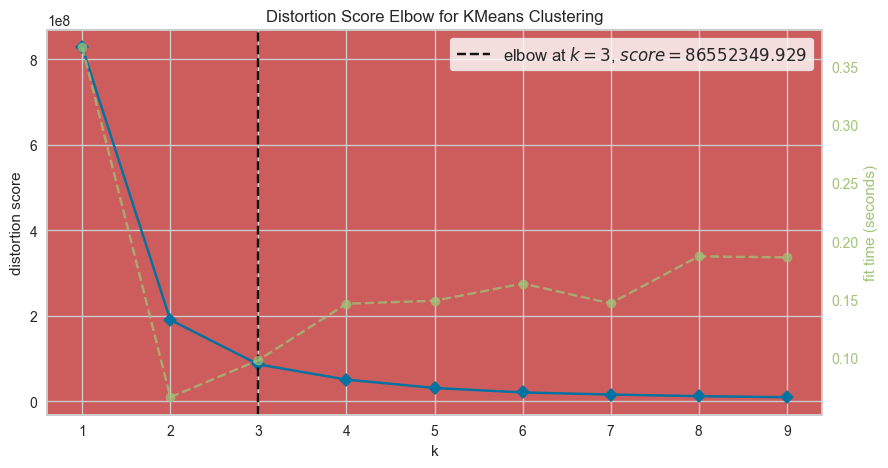

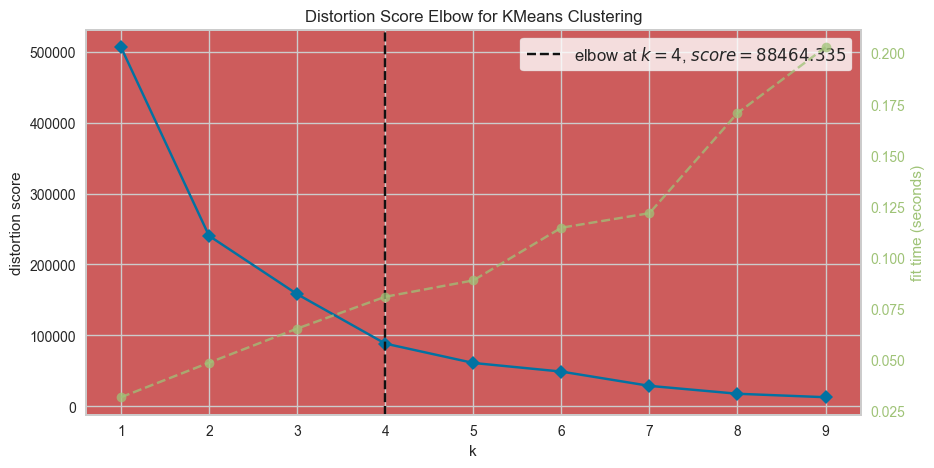

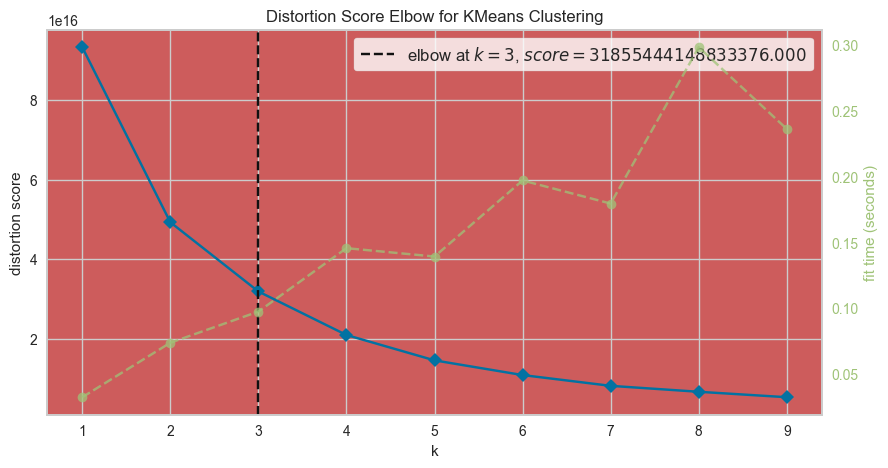

        CustomerID  recency  frequency  monetary  recency_Cluster  \
0                1     -308          1    105503                0   
1                8     -182          1   1098496                2   
2               18     -345          1    287492                0   
3               25     -203          1     86294                2   
4               33     -230          1    179159                2   
...            ...      ...        ...       ...              ...   
294986     2174031     -293          1    171351                1   
294987     2174038     -198          1     62229                2   
294988     2174045     -313          1     76553                0   
294989     2174051     -348          1    268894                0   
294990     2174065     -254          1    138943                1   

        frequency_Cluster  monetary_Cluster  
0                       0                 0  
1                       0                 1  
2                       0        

In [27]:
# Apply K-Means clustering to each metric and add cluster labels
rfm_df = find_optimal_k_and_cluster(rfm_df, 'recency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'frequency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'monetary')

# Print the DataFrame with cluster columns
print(rfm_df)

In [28]:
rfm_df.groupby('frequency_Cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_Cluster,,,,,,,,
0,267353.0,1.144689,0.351788,1.0,1.0,1.0,1.0,2.0
1,13508.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
2,12034.0,4.800981,0.972674,4.0,4.0,4.0,5.0,7.0
3,2096.0,11.159351,5.849863,8.0,8.0,9.0,12.0,99.0


In [29]:
rfm_df['RFMScore'] = rfm_df.recency_Cluster + rfm_df.frequency_Cluster + rfm_df.monetary_Cluster

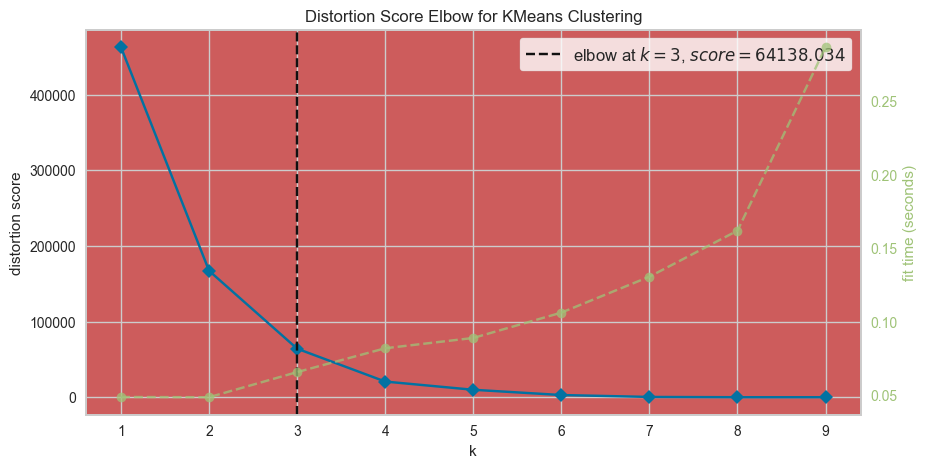

In [30]:
rfm_df = find_optimal_k_and_cluster(rfm_df, 'RFMScore')


In [31]:
rfm_df['RFMScore'].value_counts()

RFMScore
0    92359
2    90318
1    82062
3    12321
5     8074
4     7706
6     1676
7      475
Name: count, dtype: int64

In [32]:
rfm_df.head()

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster
0,1,-308,1,105503,0,0,0,0,0
1,8,-182,1,1098496,2,0,1,3,2
2,18,-345,1,287492,0,0,0,0,0
3,25,-203,1,86294,2,0,0,2,1
4,33,-230,1,179159,2,0,0,2,1


In [33]:
# Other feature
temporal_in_df.head()

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,month,year,month_year
251503,251503,251503,Delivery,WEBSITE,2022-01-14 00:00:00+00:00,183024,601036,Male,Yes,Ho Chi Minh City,1,2022,202201
251504,251504,251504,Take Away,STORE,2022-01-14 00:00:00+00:00,2344881,105043,Male,Yes,Hanoi,1,2022,202201
251505,251505,251505,Delivery,CALL CENTER,2022-01-14 00:00:00+00:00,358094,1564414,Female,No,Hanoi,1,2022,202201
251506,251506,251506,Delivery,CALL CENTER,2022-01-14 00:00:00+00:00,283652,1191258,Unknown,No,Nothern Provinces,1,2022,202201
251507,251507,251507,Take Away,CALL CENTER,2022-01-14 00:00:00+00:00,162079,853196,Male,No,Hanoi,1,2022,202201


In [34]:

temporal_in_df=pd.get_dummies(df, columns=['Channel','OrderFrom','Province'], drop_first=False)
temporal_in_df['Voucher'] = temporal_in_df['VoucherStatus'].map({'Yes': 1, 'No': 0})
temporal_in_df

,Unnamed: 0,BillID,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,month,year,month_year,...,Channel_Take Away,OrderFrom_APP,OrderFrom_CALL CENTER,OrderFrom_STORE,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher
0,0,0,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,10,2021,202110,...,True,False,True,False,False,False,True,False,False,0
1,1,1,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,10,2021,202110,...,True,False,False,True,False,True,False,False,False,0
2,2,2,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,10,2021,202110,...,True,False,False,False,True,True,False,False,False,0
3,3,3,2021-10-01 00:00:00+00:00,424762,125643,Male,No,10,2021,202110,...,True,False,False,True,False,True,False,False,False,0
4,4,4,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,10,2021,202110,...,False,False,False,True,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1048570,2023-01-09 00:00:00+00:00,178107,1398136,Unknown,No,1,2023,202301,...,False,False,False,True,False,False,False,False,True,0
1048571,1048571,1048571,2023-01-09 00:00:00+00:00,331447,2023258,Unknown,No,1,2023,202301,...,True,False,False,True,False,True,False,False,False,0
1048572,1048572,1048572,2023-01-09 00:00:00+00:00,381509,2041510,Female,Yes,1,2023,202301,...,True,False,False,False,True,False,False,False,True,1
1048573,1048573,1048573,2023-01-09 00:00:00+00:00,508205,1927215,Unknown,Yes,1,2023,202301,...,True,False,False,True,False,True,False,False,False,1


In [35]:
temporal_in_df['Voucher'] = temporal_in_df['VoucherStatus'].map({'Yes': 1, 'No': 0})

In [36]:
temporal_in_df.columns

Index(['Unnamed: 0', 'BillID', 'TransactionDate', 'SalesAmount', 'CustomerID',
       'CustomerGender', 'VoucherStatus', 'month', 'year', 'month_year',
       'Channel_Delivery', 'Channel_Dine In', 'Channel_Take Away',
       'OrderFrom_APP', 'OrderFrom_CALL CENTER', 'OrderFrom_STORE',
       'OrderFrom_WEBSITE', 'Province_Hanoi', 'Province_Ho Chi Minh City',
       'Province_Nothern Provinces', 'Province_Southern Provinces', 'Voucher'],
      dtype='object')

In [37]:
# average customer behavior
behavor_features_df=temporal_in_df.groupby('CustomerID')[['Channel_Delivery', 'Channel_Dine In', 'Channel_Take Away', 'OrderFrom_APP',\
     'OrderFrom_CALL CENTER', 'OrderFrom_STORE',
       'OrderFrom_WEBSITE', 'Province_Hanoi', 'Province_Ho Chi Minh City',
       'Province_Nothern Provinces', 'Province_Southern Provinces', 'Voucher']].mean().reset_index()


In [38]:
behavor_features_df.head()

,CustomerID,Channel_Delivery,Channel_Dine In,Channel_Take Away,OrderFrom_APP,OrderFrom_CALL CENTER,OrderFrom_STORE,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher
0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
#Transaction last month
cut_off_28d=cut_off-pd.to_timedelta(28,unit="d")
transaction_last_month_df=temporal_in_df[temporal_in_df['TransactionDate']>=cut_off_28d]
transaction_last_month_df=transaction_last_month_df.groupby('CustomerID')['BillID'].nunique().reset_index()
transaction_last_month_df=transaction_last_month_df.rename(columns={
    'CustomerID': 'CustomerID',
    'BillID': 'lastmonthbills'
})
transaction_last_month_df.head()

,CustomerID,lastmonthbills
0,8,1
1,16,1
2,25,2
3,26,1
4,38,1


In [40]:
#Transaction last 2 weeks
cut_off_14d=cut_off-pd.to_timedelta(14,unit="d")
transaction_last_2w_df=temporal_in_df[temporal_in_df['TransactionDate']>=cut_off_14d]
transaction_last_2w_df=transaction_last_2w_df.groupby('CustomerID')['BillID'].nunique().reset_index()
transaction_last_2w_df.columns=['CustomerID',"2wbills"]

transaction_last_2w_df.head()

,CustomerID,2wbills
0,8,1
1,16,1
2,25,1
3,26,1
4,38,1


In [41]:
#Combine features 
# Kết hợp các DataFrame với nhau theo chiều cột
combined_df = rfm_df.merge(behavor_features_df, on='CustomerID', how='outer').merge(transaction_last_2w_df, on='CustomerID', how='outer')\
    .merge(transaction_last_month_df, on='CustomerID', how='outer')

# Ghép với targets_df theo index, giữ lại tất cả các hàng từ combined_df
feature_df = combined_df.merge(targets_df, on='CustomerID', how="left")

# Điền các giá trị thiếu (NaN) bằng giá trị mong muốn (ví dụ: 0)
feature_df = feature_df.fillna(0)
feature_df

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,sale_180_values,sale_180_flag
0,1,-308.0,1.0,105503.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,8,-182.0,1.0,1098496.0,2.0,0.0,1.0,3.0,2.0,1.000000,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0
2,18,-345.0,1.0,287492.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,25,-203.0,1.0,86294.0,2.0,0.0,0.0,2.0,1.0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.0,2.0,95304.0,1.0
4,33,-230.0,1.0,179159.0,2.0,0.0,0.0,2.0,1.0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583637,2174059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
583638,2174066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.0,1.0,0.0,0.0
583639,2174072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.666667,0.0,0.666667,0.0,0.333333,0.0,3.0,3.0,0.0,0.0
583640,2174075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,1.0,1.0,0.0,0.0


In [42]:
# Meachine learning
# regression 
reg_setup=reg.setup(data=feature_df.drop('sale_180_flag',axis=1),\
    target='sale_180_values',ignore_features='CustomerID',\
        train_size=0.8,
        normalize=True,
        session_id=123,
        log_experiment=False)

,Description,Value
0,Session id,123
1,Target,sale_180_values
2,Target type,Regression
3,Original data shape,"(583642, 24)"
4,Transformed data shape,"(583642, 23)"
5,Transformed train set shape,"(466913, 23)"
6,Transformed test set shape,"(116729, 23)"
7,Ignore features,10
8,Numeric features,22
9,Preprocess,True


In [43]:

best_model = reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,29208.1887,41652887122.1630,200075.4347,0.7247,5.8791,0.4373,2.0690
gbr,Gradient Boosting Regressor,37902.3099,44298591785.5212,206100.7227,0.7068,8.1367,0.4202,37.9470
xgboost,Extreme Gradient Boosting,30227.1566,45444559257.6000,209906.3391,0.6969,6.1559,0.4445,2.6300
rf,Random Forest Regressor,29593.4782,46459177637.0536,212278.6711,0.6895,0.4359,0.4776,35.5760
et,Extra Trees Regressor,30428.7470,46627758778.0538,212423.4948,0.6856,0.5323,0.4906,43.3230
knn,K Neighbors Regressor,35353.8852,50050711552.0000,220778.1812,0.6652,1.4801,0.4971,29.3440
br,Bayesian Ridge,111796.5852,70532432691.2000,263710.8156,0.5227,10.2490,0.4621,32.6360
llar,Lasso Least Angle Regression,111797.6773,70532476518.4000,263711.0141,0.5226,10.2490,0.4621,0.5970
ridge,Ridge Regression,111798.4484,70532487987.2000,263711.0703,0.5226,10.2490,0.4621,0.7150
lasso,Lasso Regression,111797.3719,70532478566.4000,263711.0281,0.5226,10.2490,0.4621,48.0480


In [48]:

reg_model=reg.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28427.2348,57385883346.1387,239553.5083,0.6532,0.4169,0.4726
1,30783.2008,56338663336.3302,237357.6696,0.6354,0.4186,0.4736
2,30512.4791,50447491555.5463,224605.1904,0.6892,0.4162,0.4669
3,29112.5117,29392656359.8523,171442.8662,0.7838,0.4168,0.4884
4,30669.2940,82461228423.8081,287160.6317,0.5575,0.4298,0.4710
5,30347.2941,37052861316.7851,192491.1980,0.7298,0.4292,0.4881
6,29101.0437,43113171311.7688,207637.1145,0.6477,0.4564,0.4791
7,27461.9099,20622453684.6577,143605.2008,0.8130,0.4440,0.4781
8,29273.8518,42413500204.9179,205945.3816,0.6962,0.4844,0.4716


In [51]:
reg_prediction_df=reg.predict_model(reg_model,data=feature_df).sort_values('prediction_label',ascending=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,14857.0967,20221193141.6400,142201.2417,0.8687,0.3741,0.2371


In [52]:
reg_prediction_df.sort_values('prediction_label',ascending=False)

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,sale_180_flag,sale_180_values,prediction_label
23944,175175,-181.0,4.0,24698444.0,2.0,2.0,2.0,6.0,2.0,0.750000,...,1.0,0.000000,0.0,0.000000,0.00000,7.0,7.0,1.0,44811552.0,30315135.21
19855,145086,-352.0,1.0,180769.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.000000,0.0,1.000000,0.00000,3.0,3.0,1.0,49939760.0,28839101.03
104069,766722,-207.0,9.0,36735180.0,2.0,3.0,2.0,7.0,2.0,0.375000,...,1.0,0.000000,0.0,0.000000,0.00000,7.0,8.0,1.0,22448454.0,28722041.87
66371,488818,-360.0,3.0,44055676.0,0.0,1.0,2.0,3.0,2.0,0.428571,...,0.0,0.071429,0.0,0.928571,0.00000,8.0,8.0,1.0,3225971.0,26853060.28
21592,157700,-184.0,25.0,7158166.0,2.0,3.0,2.0,7.0,2.0,0.073394,...,0.0,0.000000,1.0,0.000000,0.12844,85.0,97.0,1.0,27378896.0,22724239.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556799,1972423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.0,0.000000,0.0,1.000000,0.00000,2.0,2.0,0.0,0.0,0.00
556800,1972434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00
556786,1972342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00
556769,1972206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.000000,0.0,1.000000,0.00000,1.0,1.0,0.0,0.0,0.00


In [54]:
reg.evaluate_model(reg_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
reg.save_model(reg_model,'pizza_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['recency', 'frequency', 'monetary',
                                              'recency_Cluster',
                                              'frequency_Cluster',
                                              'monetary_Cluster', 'RFMScore',
                                              'RFMScore_Cluster',
                                              'Channel_Delivery',
                                              'Channel_Dine In',
                                              'Channel_Take Away',
                                              'OrderFrom_APP',
                                              'OrderFrom_CALL CENTER',
                                              'OrderFrom_STORE',
                                              'OrderFrom_WEBSITE',
                                              'Pro...
                                             

In [58]:
# Classification
clf_setup=clf.setup(data=feature_df.drop('sale_180_values',axis=1),\
    target='sale_180_flag',ignore_features='CustomerID',\
        train_size=0.8,
        normalize=True,
        session_id=123,
        log_experiment=False)

,Description,Value
0,Session id,123
1,Target,sale_180_flag
2,Target type,Binary
3,Original data shape,"(583642, 24)"
4,Transformed data shape,"(583642, 23)"
5,Transformed train set shape,"(466913, 23)"
6,Transformed test set shape,"(116729, 23)"
7,Ignore features,10
8,Numeric features,22
9,Preprocess,True


In [ ]:
best_model = clf.compare_models()

In [59]:
clf_model=clf.create_model('rf')
clf_prediction_df=clf.predict_model(clf_model,data=feature_df,raw_score=True)   
clf_prediction_df.sort_values('prediction_score_1',ascending=False)    
                 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,1.0000,0.9993,0.9947,0.9970,0.9966,0.9966
1,0.9994,1.0000,0.9993,0.9957,0.9975,0.9972,0.9972
2,0.9994,1.0000,0.9993,0.9956,0.9974,0.9971,0.9971
3,0.9994,1.0000,0.9985,0.9969,0.9977,0.9974,0.9974
4,0.9993,1.0000,0.9993,0.9952,0.9973,0.9969,0.9969
5,0.9994,1.0000,0.9991,0.9959,0.9975,0.9972,0.9972
6,0.9993,1.0000,0.9991,0.9950,0.9971,0.9967,0.9967
7,0.9993,1.0000,0.9997,0.9944,0.9970,0.9966,0.9966
8,0.9996,1.0000,0.9997,0.9967,0.9982,0.9979,0.9979


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9998,1.0000,0.9998,0.9989,0.9994,0.9993,0.9993


,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,sale_180_values,sale_180_flag,prediction_label,prediction_score_0,prediction_score_1
58975,433269,-223.0,2.0,736731.0,2.0,0.0,0.0,2.0,1.0,0.166667,...,0.0,0.0,0.000000,1.0,1.0,257093.0,1.0,1,0.0,1.0
67863,499423,-252.0,1.0,224965.0,1.0,0.0,0.0,1.0,1.0,0.666667,...,0.0,0.0,0.666667,2.0,2.0,426700.0,1.0,1,0.0,1.0
144815,1067246,-286.0,1.0,278372.0,1.0,0.0,0.0,1.0,1.0,1.000000,...,1.0,0.0,0.000000,1.0,1.0,236341.0,1.0,1,0.0,1.0
281302,2072723,-261.0,2.0,165383.0,1.0,0.0,0.0,1.0,1.0,0.000000,...,1.0,0.0,0.000000,1.0,1.0,90451.0,1.0,1,0.0,1.0
144817,1067252,-346.0,1.0,175919.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.0,0.0,0.666667,1.0,1.0,466410.0,1.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229523,1690138,-225.0,1.0,163611.0,2.0,0.0,0.0,2.0,1.0,0.500000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1.0,0.0
229522,1690124,-193.0,1.0,110231.0,2.0,0.0,0.0,2.0,1.0,0.000000,...,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0,1.0,0.0
229521,1690117,-347.0,1.0,135718.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1.0,0.0
229520,1690099,-229.0,1.0,329719.0,2.0,0.0,0.0,2.0,1.0,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1.0,0.0


In [ ]:
importances = reg.reg_model.feature_importances_

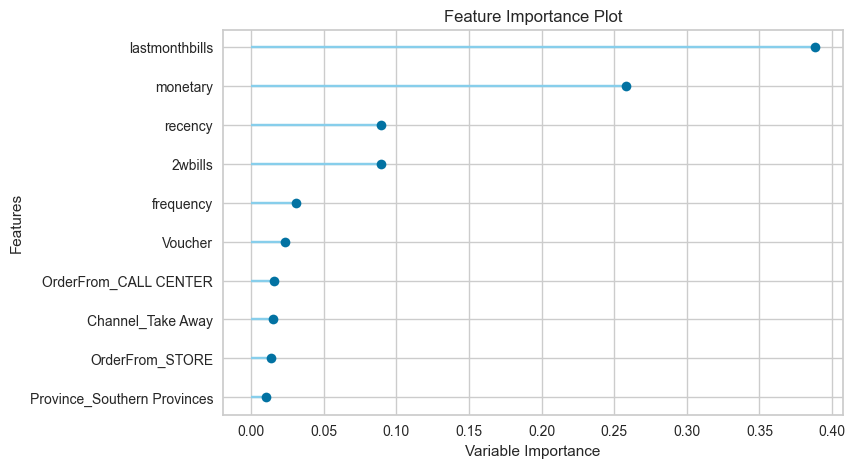

In [ ]:
# Business value 

reg.plot_model(reg_model, 'feature')

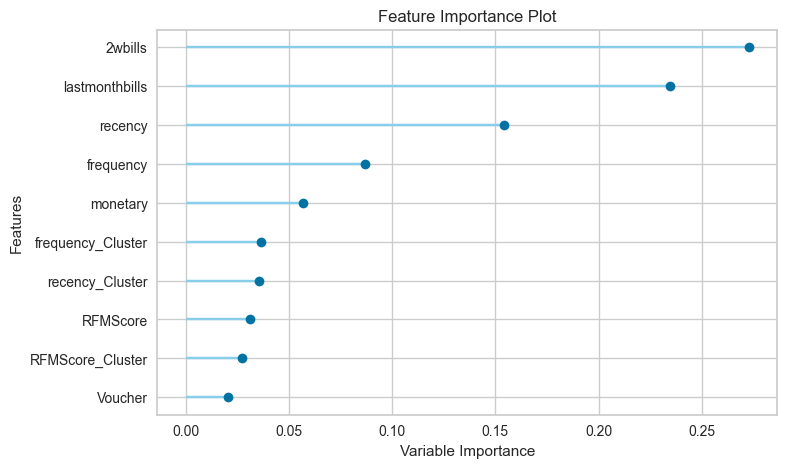

In [ ]:
clf.plot_model(clf_model, plot='feature')

In [ ]:
# Business Value 
# What could happen if you could increase revenue by 10% 
reg_prediction_df['prediction_label'].sum()

50227530111.369995

In [ ]:
# Focus on top 20 potential customer 
top_20_customer=reg_prediction_df.head(20)
top_20_customer

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,sale_90_flag,sale_90_values,prediction_label
23944,175175,0.0,4.0,24698444.0,2.0,1.0,2.0,5.0,2.0,0.750000,...,1.000000,0.000000,0.000000,0.000000,0.000000,7.0,7.0,1.0,44811552.0,30392702.63
104069,766722,-26.0,9.0,36735180.0,2.0,2.0,2.0,6.0,2.0,0.375000,...,1.000000,0.000000,0.000000,0.000000,0.000000,7.0,8.0,1.0,22448454.0,29229823.28
19855,145086,-171.0,1.0,180769.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,3.0,3.0,1.0,49939760.0,28814981.78
66371,488818,-179.0,3.0,44055676.0,0.0,1.0,2.0,3.0,2.0,0.428571,...,0.000000,0.071429,0.000000,0.928571,0.000000,8.0,8.0,1.0,3225971.0,27033897.16
21592,157700,-3.0,25.0,7158166.0,2.0,2.0,2.0,6.0,2.0,0.073394,...,0.000000,0.000000,1.000000,0.000000,0.128440,85.0,97.0,1.0,27378896.0,23055250.12
219293,1614302,-46.0,3.0,2994447.0,2.0,1.0,1.0,4.0,2.0,0.833333,...,0.000000,1.000000,0.000000,0.000000,0.055556,15.0,15.0,1.0,29544044.0,20513630.36
231270,1703174,-173.0,2.0,681748.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.000000,0.000000,1.000000,0.000000,0.000000,3.0,3.0,1.0,27795336.0,17346053.96
263263,1939772,-25.0,8.0,13706719.0,2.0,2.0,2.0,6.0,2.0,0.550000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.0,14.0,1.0,23250160.0,17266496.01
249286,1836825,-19.0,52.0,44406208.0,2.0,2.0,2.0,6.0,2.0,1.000000,...,0.062500,0.937500,0.000000,0.000000,0.000000,14.0,16.0,1.0,11695337.0,16822011.31
33323,243943,-1.0,72.0,25032850.0,2.0,2.0,2.0,6.0,2.0,0.024390,...,0.000000,1.000000,0.000000,0.000000,0.048780,47.0,52.0,1.0,16803378.0,16821758.75


In [60]:
# Save model

clf.save_model(clf_model,'pizza_clf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['recency', 'frequency', 'monetary',
                                              'recency_Cluster',
                                              'frequency_Cluster',
                                              'monetary_Cluster', 'RFMScore',
                                              'RFMScore_Cluster',
                                              'Channel_Delivery',
                                              'Channel_Dine In',
                                              'Channel_Take Away',
                                              'OrderFrom_APP',
                                              'OrderFrom_CALL CENTER',
                                              'OrderFrom_STORE',
                                              'OrderFrom_...
                  RandomForestClassifier(bootstrap=Tru

In [ ]:
feature_df.to_csv('feature_df.csv',index=False)

In [ ]:
reg_prediction_df.to_csv('train_reg_df',index=False)
clf_prediction_df.to_csv('train_clf_df',index=False)

# 3. Customer behavior prediction analysis

In [ ]:
# Prepare data 

In [ ]:
df_2022=df[df['TransactionDate'].dt.year == 2022]
df_2022

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
216908,216908,216908,Take Away,CALL CENTER,2022-01-01 00:00:00+00:00,398018,1827105,Male,No,Southern Provinces
216909,216909,216909,Delivery,CALL CENTER,2022-01-01 00:00:00+00:00,236024,511683,Unknown,No,Southern Provinces
216910,216910,216910,Dine In,STORE,2022-01-01 00:00:00+00:00,273001,1008705,Female,No,Southern Provinces
216911,216911,216911,Take Away,STORE,2022-01-01 00:00:00+00:00,383525,399251,Male,No,Ho Chi Minh City
216912,216912,216912,Delivery,STORE,2022-01-01 00:00:00+00:00,175320,2050163,Female,No,Ho Chi Minh City
...,...,...,...,...,...,...,...,...,...,...
1029062,1029062,1029062,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,248627,224643,Male,No,Hanoi
1029063,1029063,1029063,Take Away,CALL CENTER,2022-12-31 00:00:00+00:00,405030,556434,Male,No,Hanoi
1029064,1029064,1029064,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,115461,90116,Unknown,No,Nothern Provinces
1029065,1029065,1029065,Take Away,STORE,2022-12-31 00:00:00+00:00,207674,1445947,Unknown,No,Hanoi


In [ ]:
n_days=180
max_date=df_2022['TransactionDate'].max()

cut_off=max_date-pd.to_timedelta(n_days, unit="d")

In [ ]:
cust6m_df=df_2022[df_2022['TransactionDate']>= cut_off]
cust6m_df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
659946,659946,659946,Delivery,APP,2022-07-04 00:00:00+00:00,366546,1242978,Male,Yes,Southern Provinces
659947,659947,659947,Delivery,WEBSITE,2022-07-04 00:00:00+00:00,167665,410842,Male,No,Nothern Provinces
659948,659948,659948,Take Away,STORE,2022-07-04 00:00:00+00:00,201481,1452536,Unknown,No,Southern Provinces
659949,659949,659949,Take Away,WEBSITE,2022-07-04 00:00:00+00:00,270532,216906,Unknown,No,Hanoi
659950,659950,659950,Take Away,STORE,2022-07-04 00:00:00+00:00,108395,1556263,Female,No,Ho Chi Minh City
...,...,...,...,...,...,...,...,...,...,...
1029062,1029062,1029062,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,248627,224643,Male,No,Hanoi
1029063,1029063,1029063,Take Away,CALL CENTER,2022-12-31 00:00:00+00:00,405030,556434,Male,No,Hanoi
1029064,1029064,1029064,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,115461,90116,Unknown,No,Nothern Provinces
1029065,1029065,1029065,Take Away,STORE,2022-12-31 00:00:00+00:00,207674,1445947,Unknown,No,Hanoi


In [ ]:
#Set Latest date 2023-01-01


In [ ]:
rfm_df=create_rfm(cust6m_df,Latest_Date)

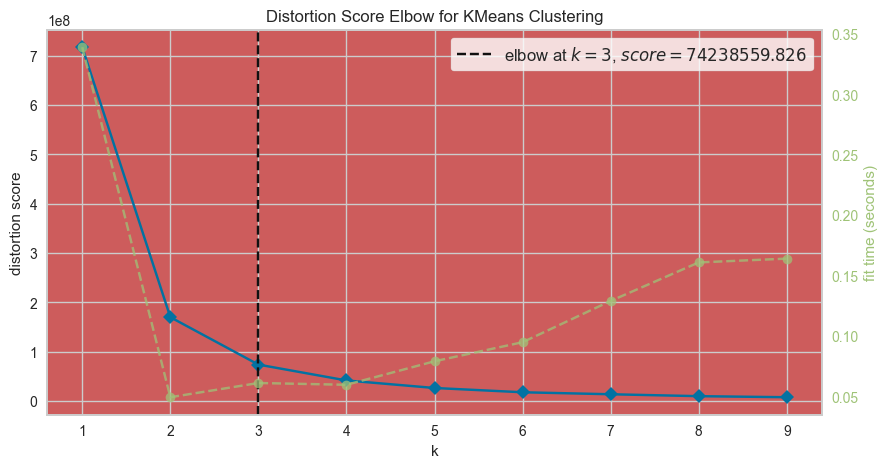

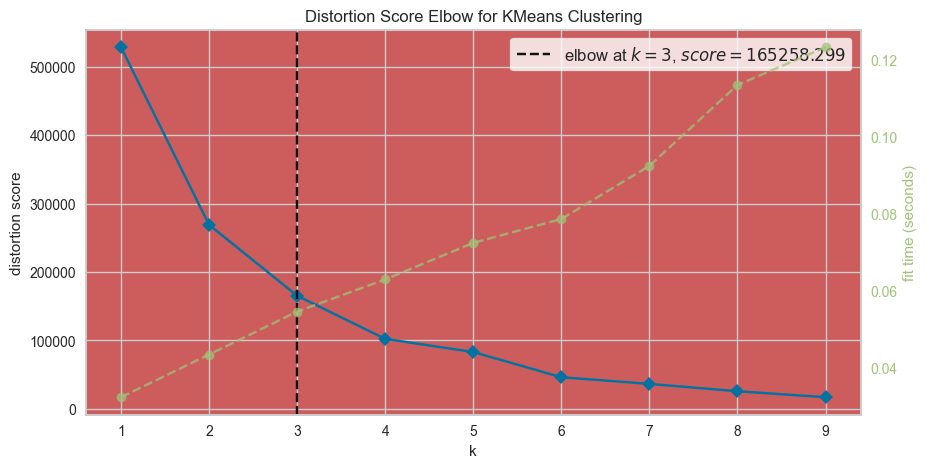

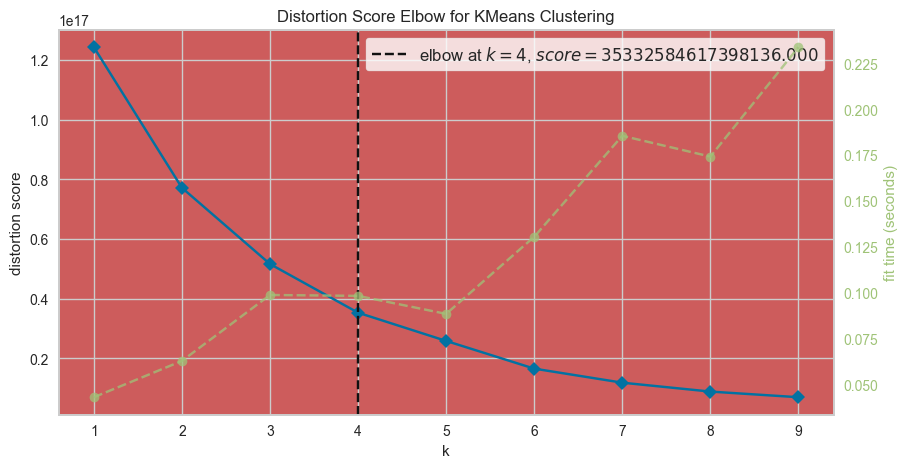

        CustomerID  recency  frequency  monetary  recency_Cluster  \
0                8     -182          1   1098496                0   
1               16     -115          1    286558                1   
2               25      -23          1     95304                2   
3               26      -57          1    269591                2   
4               38     -147          1    292120                0   
...            ...      ...        ...       ...              ...   
246250     2174029     -167          1    249261                0   
246251     2174039      -71          1    513918                1   
246252     2174050      -68          1    182623                1   
246253     2174072      -36          3    953618                2   
246254     2174075      -30          1    262489                2   

        frequency_Cluster  monetary_Cluster  
0                       0                 0  
1                       0                 0  
2                       0        

In [ ]:
# Apply K-Means clustering to each metric and add cluster labels
rfm_df = find_optimal_k_and_cluster(rfm_df, 'recency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'frequency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'monetary')

# Print the DataFrame with cluster columns
print(rfm_df)

In [ ]:
rfm_df['RFMScore'] = rfm_df.recency_Cluster + rfm_df.frequency_Cluster + rfm_df.monetary_Cluster

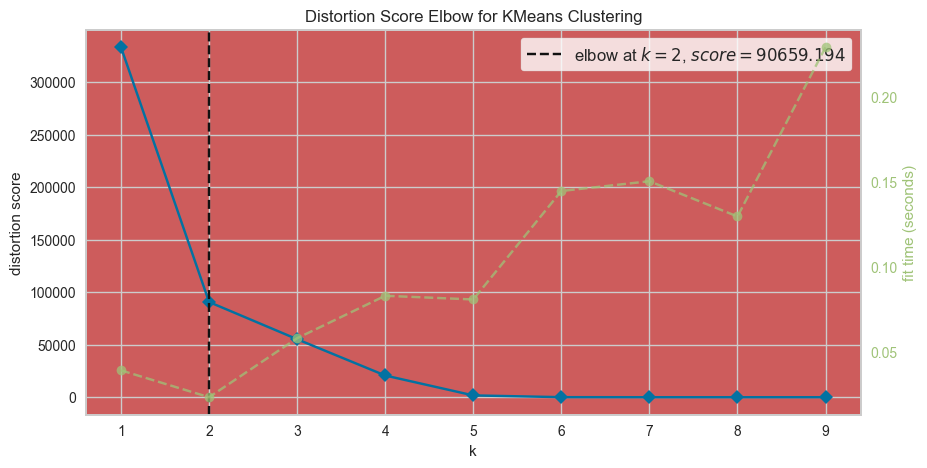

In [ ]:
rfm_df = find_optimal_k_and_cluster(rfm_df, 'RFMScore')

In [ ]:
cust6m_df=pd.get_dummies(cust6m_df, columns=['Channel','OrderFrom','Province'], drop_first=False)
cust6m_df['Voucher'] = cust6m_df['VoucherStatus'].map({'Yes': 1, 'No': 0})
# average customer behavior
behavor_features_df=cust6m_df.groupby('CustomerID')[['Channel_Delivery', 'Channel_Dine In', 'Channel_Take Away', 'OrderFrom_APP',\
     'OrderFrom_CALL CENTER', 'OrderFrom_STORE',
       'OrderFrom_WEBSITE', 'Province_Hanoi', 'Province_Ho Chi Minh City',
       'Province_Nothern Provinces', 'Province_Southern Provinces', 'Voucher']].mean().reset_index()

In [ ]:
#Transaction last month
cut_off_28d=cut_off-pd.to_timedelta(28,unit="d")
transaction_last_month_df=cust6m_df[cust6m_df['TransactionDate']>=cut_off_28d]
transaction_last_month_df=transaction_last_month_df.groupby('CustomerID')['BillID'].nunique().reset_index()
transaction_last_month_df=transaction_last_month_df.rename(columns={
    'CustomerID': 'CustomerID',
    'BillID': 'lastmonthbills'
})
transaction_last_month_df.head()

,CustomerID,lastmonthbills
0,8,1
1,16,1
2,25,1
3,26,1
4,38,1


In [ ]:
#Transaction last 2 weeks
cut_off_14d=cut_off-pd.to_timedelta(14,unit="d")
transaction_last_2w_df=cust6m_df[cust6m_df['TransactionDate']>=cut_off_14d]
transaction_last_2w_df=transaction_last_2w_df.groupby('CustomerID')['BillID'].nunique().reset_index()
transaction_last_2w_df.columns=['CustomerID',"2wbills"]

In [ ]:
combined_df = rfm_df.merge(behavor_features_df, on='CustomerID', how='outer').merge(transaction_last_2w_df, on='CustomerID', how='outer')\
    .merge(transaction_last_month_df, on='CustomerID', how='outer')

In [ ]:
combined_df

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,OrderFrom_CALL CENTER,OrderFrom_STORE,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills
0,8,173,1,1098496,2,0,0,2,1,1.000000,...,1.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1
1,16,106,1,286558,1,0,0,1,0,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,1.0,0.000000,0.0,1,1
2,25,14,1,95304,0,0,0,0,0,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1
3,26,48,1,269591,0,0,0,0,0,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1
4,38,138,1,292120,2,0,0,2,1,1.000000,...,1.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246250,2174029,158,1,249261,2,0,0,2,1,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,0.0,1,1
246251,2174039,62,1,513918,1,0,0,1,0,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1
246252,2174050,59,1,182623,1,0,0,1,0,0.000000,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,1,1
246253,2174072,27,3,953618,0,1,0,1,0,0.333333,...,0.0,0.0,0.666667,0.0,0.666667,0.0,0.333333,0.0,3,3


In [ ]:
reg_model=reg.load_model(r'D:\study_da\Home work lv3\ven_demo\venv\Include\Pizza hut\pizza_reg')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
feature_names = reg_model.feature_names_in_
feature_importance = reg_model.feature_importances_
# Create a DataFrame for feature importance
adjusted_feature_names = feature_names[:-1]
feature_importance_reg_df = pd.DataFrame({'Feature': adjusted_feature_names, 'Importance': feature_importance})
feature_importance_reg_df
# Save the DataFrame to a CSV file
feature_importance_reg_df.to_csv('feature_importance_reg.csv', index=False)


In [ ]:
reg_prediction_df=reg.predict_model(reg_model,combined_df)

In [ ]:
reg_prediction_df

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,OrderFrom_STORE,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,prediction_label
0,8,173,1,1098496,2,0,0,2,1,1.000000,...,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1,0.00
1,16,106,1,286558,1,0,0,1,0,1.000000,...,0.0,1.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0.00
2,25,14,1,95304,0,0,0,0,0,0.000000,...,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0.00
3,26,48,1,269591,0,0,0,0,0,0.000000,...,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0.00
4,38,138,1,292120,2,0,0,2,1,1.000000,...,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246250,2174029,158,1,249261,2,0,0,2,1,1.000000,...,0.0,1.000000,0.0,1.000000,0.0,0.000000,0.0,1,1,0.00
246251,2174039,62,1,513918,1,0,0,1,0,0.000000,...,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0.00
246252,2174050,59,1,182623,1,0,0,1,0,0.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,1,1,0.00
246253,2174072,27,3,953618,0,1,0,1,0,0.333333,...,0.0,0.666667,0.0,0.666667,0.0,0.333333,0.0,3,3,665761.35


In [ ]:
clf_model=clf.load_model(r'D:\study_da\Home work lv3\ven_demo\venv\Include\Pizza hut\pizza_clf')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
feature_names = clf_model.feature_names_in_
feature_importance = clf_model.feature_importances_
# Create a DataFrame for feature importance
adjusted_feature_names = feature_names[:-1]
feature_importance_clf_df = pd.DataFrame({'Feature': adjusted_feature_names, 'Importance': feature_importance})
feature_importance_clf_df
# Save the DataFrame to a CSV file
feature_importance_clf_df.to_csv('feature_importance_clf.csv', index=False)

In [ ]:
clf_prediction_df=clf.predict_model(clf_model,combined_df)
clf_prediction_df

,CustomerID,recency,frequency,monetary,recency_Cluster,frequency_Cluster,monetary_Cluster,RFMScore,RFMScore_Cluster,Channel_Delivery,...,OrderFrom_WEBSITE,Province_Hanoi,Province_Ho Chi Minh City,Province_Nothern Provinces,Province_Southern Provinces,Voucher,2wbills,lastmonthbills,prediction_label,prediction_score
0,8,-182,1,1098496,0,0,0,0,0,1.000000,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1,1,0.66
1,16,-115,1,286558,1,0,0,1,0,1.000000,...,1.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0,0.52
2,25,-23,1,95304,2,0,0,2,0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0,0.92
3,26,-57,1,269591,2,0,0,2,0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0,0.92
4,38,-147,1,292120,0,0,0,0,0,1.000000,...,0.000000,1.0,0.000000,0.0,0.000000,0.0,1,1,1,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246250,2174029,-167,1,249261,0,0,0,0,0,1.000000,...,1.000000,0.0,1.000000,0.0,0.000000,0.0,1,1,1,0.65
246251,2174039,-71,1,513918,1,0,0,1,0,0.000000,...,0.000000,0.0,0.000000,1.0,0.000000,0.0,1,1,0,0.61
246252,2174050,-68,1,182623,1,0,0,1,0,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,1,1,0,0.61
246253,2174072,-36,3,953618,2,1,0,3,1,0.333333,...,0.666667,0.0,0.666667,0.0,0.333333,0.0,3,3,1,0.77


In [ ]:
clf_prediction_df.to_csv('clf_prediction_df.csv',index=False)
reg_prediction_df.to_csv('reg_prediction_df.csv', index=False)